In [2]:
import pandas as pd
df=pd.read_csv("/content/Restaurant_Reviews.csv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


<Axes: xlabel='Liked', ylabel='count'>

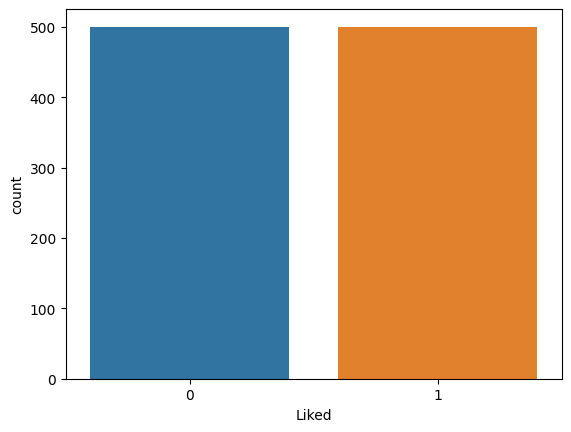

In [3]:
import seaborn as sns
sns.countplot(x="Liked",data=df)

In [4]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [6]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [13]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> wordnet
Command 'wordnet' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> wordnet



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

Data Preprocessing

In [14]:
corpus = []
for i in range(len(df)):
  text = df['Review'][i]
  text = text.lower()
  import re
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.split()
  # lemmatizing the text
  lemma = WordNetLemmatizer()
  text  = [lemma.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
  text = ' '.join(text)
  corpus.append(text)
  df['Review'][i] = text

<ipython-input-14-3d3edc6ac126>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'][i] = text


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
x = vect.fit_transform(corpus).toarray()
y = df['Liked'].values

Data Splitting

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

model training

In [17]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression()
model = Classifier.fit(x_train,y_train)


model prediction

In [20]:
y_pred = model.predict(x_test)

model evaluation

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.752

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[95 24]
 [38 93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       119
           1       0.79      0.71      0.75       131

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.76      0.75      0.75       250



In [27]:
from sklearn.svm import SVC
model2 = SVC(kernel='rbf')
model2.fit(x_train, y_train)
y2_pred = model2.predict(x_test)
accuracy = accuracy_score(y_test, y2_pred)
print("Accuracy:", accuracy)

Accuracy: 0.752


In [29]:
model3 = SVC(kernel='sigmoid')
model3.fit(x_train, y_train)
y3_pred = model3.predict(x_test)
accuracy = accuracy_score(y_test, y3_pred)
print("Accuracy:", accuracy)

Accuracy: 0.772
